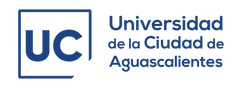

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

### Tarea 2.2 Distribucion de Frecuencia

## Conociendo la base de datos, revisar los datos y columnas del data frame

In [1]:
import pandas as pd
df = pd.read_csv("s02_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Dictionaries
dicts = {
    "sex": {
        "male": "Hombre",
        "female": "Mujer"
    },
    "survived" : {
        0: "No",
        1: "Si"
    },
    "class" : {
        1: "1a",
        2: "2a",
        3: "3a"
    },
    "embarked": {
        "C": "Cherbourg",
        "Q": "Queenstown",
        "S": "Southampton"
    }
}


### Distribuciones de frecuencia para una variable cualitativa

Verificar la frecuencia por sexo

In [3]:
freq_sexo = df.Sex.value_counts()
freq_sexo.rename(index=dicts["sex"], inplace=True)
freq_sexo

Hombre    577
Mujer     314
Name: Sex, dtype: int64

Verificar el % porcentaje por sexo

In [4]:
porcent_sexo = df.Sex.value_counts(normalize=True)*100
porcent_sexo.rename(index=dicts["sex"], inplace=True)
porcent_sexo

Hombre    64.758698
Mujer     35.241302
Name: Sex, dtype: float64

Agregar a un Data frame la frecuencia y % procentaje relativo al sexo de los pasajeros

In [5]:
distrib_sexo = pd.DataFrame({"Frecuencia": freq_sexo, "Porcentaje": porcent_sexo})
distrib_sexo.rename(index=dicts["sex"], inplace=True)
distrib_sexo

,Frecuencia,Porcentaje
Hombre,577,64.758698
Mujer,314,35.241302


Verificar la frecuencia de Passenger Class

In [6]:
freq_class = df.Pclass.value_counts()
freq_class.rename(index=dicts["class"], inplace=True)
freq_class

3a    491
1a    216
2a    184
Name: Pclass, dtype: int64

Verificar el % porcentaje de Passenger Class

In [7]:
porcent_class = df.Pclass.value_counts(normalize=True) * 100
porcent_class.rename(index=dicts["class"], inplace=True)
porcent_class

3a    55.106622
1a    24.242424
2a    20.650954
Name: Pclass, dtype: float64

Agregar a un Data frame la frecuencia y % procentaje relativo al Passenger Class

In [8]:
distr_class = pd.DataFrame({"Frecuencia": freq_class, "Porcentaje": porcent_class})
distr_class

,Frecuencia,Porcentaje
3a,491,55.106622
1a,216,24.242424
2a,184,20.650954


Verificar la frecuencia de Survived

In [9]:
freq_surv = df.Survived.value_counts()
freq_surv.rename(index=dicts["survived"], inplace=True)
freq_surv

No    549
Si    342
Name: Survived, dtype: int64

Verificar el % porcentaje de Survived

In [10]:
porcent_surv = df.Survived.value_counts(normalize=True) * 100
porcent_surv.rename(index=dicts["survived"], inplace=True)
porcent_surv

No    61.616162
Si    38.383838
Name: Survived, dtype: float64

### Distribuciones de frecuencia para **dos** de una variable cualitativa

Agregar un data dictionary para cambiar los valores de la columna Survived

In [11]:
print(f"dict_survived = {dicts['survived']}")

dict_survived = {0: 'No', 1: 'Si'}


Agregar un data dictionary para cambiar los valores de la columna Pclass

In [12]:
print(f"dict_class = {dicts['class']}")

dict_class = {1: '1a', 2: '2a', 3: '3a'}


Realizar un crosstab para observar en filas el sexo y columnas el Pclass (Las filas y columnas deben de tener los nombres datos en el data dictionary)

In [13]:
distrib_sexo_class = pd.crosstab(df.Sex, df.Pclass)
distrib_sexo_class.rename(index=dicts["sex"], columns=dicts["class"], inplace=True)
distrib_sexo_class

Pclass,1a,2a,3a
Sex,,,
Mujer,94,76,144
Hombre,122,108,347


Realizar un crosstab para observar en filas el Survived y columnas el Pclass (Las filas y columnas deben de tener los nombres datos en el data dictionary)

In [14]:
distrib_survived_class = pd.crosstab(df.Survived, df.Pclass)
distrib_survived_class.rename(index=dicts["survived"], columns=dicts["class"], inplace=True)
distrib_survived_class



Pclass,1a,2a,3a
Survived,,,
No,80,97,372
Si,136,87,119


### Distribuciones de frecuencia para **tres** de una variable cualitativa

[Aggregation functions descriptions link](https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/)

Realizar un crosstab para observar en filas el sexo, columnas el Pclass, y los valores el **promedio** de la columna Age

In [15]:
distrib_sexo_class_prm_age = pd.crosstab(df.Sex, df.Pclass, aggfunc="mean", values=df.Age)
distrib_sexo_class_prm_age.rename(index=dicts["sex"], columns=dicts["class"], inplace=True)
distrib_sexo_class_prm_age

Pclass,1a,2a,3a
Sex,,,
Mujer,35.106383,29.296053,29.552083
Hombre,41.339508,32.040093,31.568934


Realizar un crosstab para observar en filas el sexo, columnas el Pclass, y los valores la **moda** de la columna Age

In [16]:
distrib_sexo_class_mda_age = pd.crosstab(df.Sex, df.Pclass, aggfunc=pd.Series.mode, values=df.Age)
distrib_sexo_class_mda_age.rename(index=dicts["sex"], columns=dicts["class"], inplace=True)
distrib_sexo_class_mda_age

Pclass,1a,2a,3a
Sex,,,
Mujer,35.0,24.0,18.0
Hombre,36.0,"[23.0, 34.0]",22.0


Realizar un crosstab para observar en filas el Survived, columnas el Pclass, y los valores el **promedio** de la columna Age

In [17]:
distrib_surv_class_prm_age = pd.crosstab(df.Survived, df.Pclass, aggfunc="mean", values=df.Age)
distrib_surv_class_prm_age.rename(index=dicts["survived"], columns=dicts["class"], inplace=True)
distrib_surv_class_prm_age

Pclass,1a,2a,3a
Survived,,,
No,43.118750,34.618557,31.575269
Si,35.984706,26.768161,29.108571


Realizar un crosstab para observar en filas el Survived, columnas el Pclass, y los valores la **moda** de la columna Age

In [18]:
from scipy import stats
def modeFunc(vals):
    mode_r = stats.mode(vals, keepdims=True)
    return mode_r.mode[0]
distrib_surv_class_mda_age = pd.crosstab(df.Survived, df.Pclass, aggfunc=modeFunc, values=df.Age)
distrib_surv_class_mda_age.rename(index=dicts["survived"], columns=dicts["class"], inplace=True)
distrib_surv_class_mda_age

Pclass,1a,2a,3a
Survived,,,
No,47.0,23.0,22.0
Si,35.0,24.0,27.0


Realizar un crosstab para observar en filas el Survived, columnas el Pclass, y los valores el **promedio** de la columna Fare

In [19]:
distr_surv_class_prm_fare = pd.crosstab(df.Survived, df.Pclass, aggfunc="mean", values=df.Fare)
distr_surv_class_prm_fare.rename(index=dicts["survived"], columns=dicts["class"], inplace=True)
distr_surv_class_prm_fare

Pclass,1a,2a,3a
Survived,,,
No,64.684007,19.412328,13.669364
Si,95.608029,22.055700,13.694887


Realizar un crosstab para observar en filas el Sex, columnas el Pclass, y los valores el **promedio** de la columna Fare

In [20]:
distr_sex_class_prm_fare = pd.crosstab(df.Sex, df.Pclass, aggfunc="mean", values=df.Fare)
distr_sex_class_prm_fare.rename(index=dicts["sex"], columns=dicts["class"], inplace=True)
distr_sex_class_prm_fare

Pclass,1a,2a,3a
Sex,,,
Mujer,106.125798,21.970121,16.118810
Hombre,67.226127,19.741782,12.661633


Escribir conclusiones que encontraste en el desarrollo de este ejercicio:      
Con los crosstab se puede observar que los hombres más viejos viajaban en primera clase, respecto a la segunda y tercer clase, la edad promedio era bastante similar, las mujeres (siempre en menor cantidad respecto a los hombres) también de mayor edad viajaban en primera clase.      
Respecto a la cantidad de supervivientes, se nota un descenso en la edad promedio, lo cuál hace sentido dada la política de mujeres y niños con prioridad.     
También se puede inferir que durante el abandono del barco, la segregación por clases dejo de ser relevante dado que la cantidad de supervivientes se reparte de manera similar entre las tres clases, podemos suponer que no existió trato preferencial a primera clase.

**Subir tu archivo en en el apartado de Moodle**

# *#HappyCoding*